<a href="https://colab.research.google.com/github/manasi584/Tutorials/blob/main/ML/Week_1_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-1

**Note to Learners**:

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [9]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

## Problem-1

How many samples does the dataset have?

In [8]:
# Enter your solution here
X.shape

X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,
        25, 100, 122,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Problem-2

How many features does the dataset have?

In [12]:
# Enter your solution here
type(X.shape)

tuple

## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

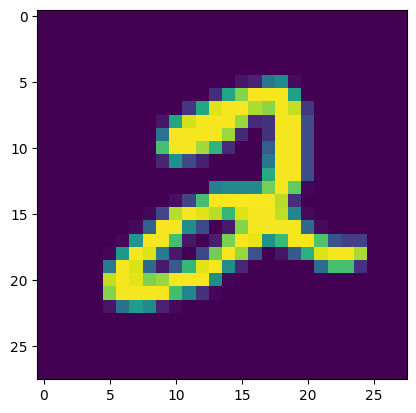

In [10]:
# Enter your solution here
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

imgplot = plt.imshow(X[0].reshape(28,28))

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [18]:
# Enter your solution here
import math

XCentered=X-np.mean(X,axis=0)
csum=np.sum(XCentered**2,axis=0)
sum=np.sum(csum)
print((sum**0.5)/(X.shape[0]*X.shape[1]))


0.23242174456564685


## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [20]:
# Enter your solution here
XCovariance=np.transpose(XCentered)@XCentered
XCovariance=XCovariance*(1/XCentered.shape[0])

csum=np.sum(XCovariance**2,axis=0)
sum=np.sum(csum)
print((sum**0.5)/(X.shape[1]**2))

1.3648061009232249


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [22]:
# Enter your solution here
eigenvalues, eigenvectors = np.linalg.eigh(XCovariance)
# Step 5: Sort the eigenvalues and eigenvectors in descending order
# The largest eigenvalues correspond to the principal components with the most variance
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Step 6: Get the first and second principal components (eigenvectors corresponding to the top two eigenvalues)
w1 = sorted_eigenvectors[:, 0]  # First principal component
w2 = sorted_eigenvectors[:, 1]  # Second principal component


w=w1+w2
print(np.sum(w))

1.0516243880598295


## Problem-7

Visualize the first principal component as an image.

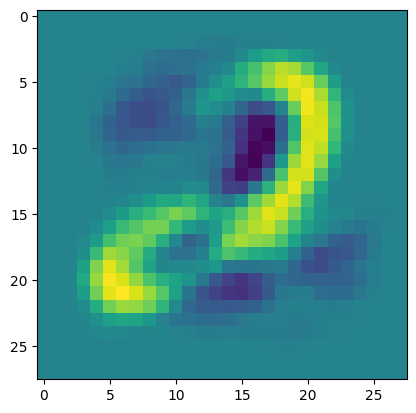

In [23]:
# Enter your solution here
imgplot=plt.imshow(w1.reshape(28,28))

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [24]:
# Enter your solution here
total_variance = np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(sorted_eigenvalues) / total_variance

# Step 7: Find the smallest value of k where the cumulative variance exceeds 95%
k = np.argmax(cumulative_variance >= 0.95) + 1  # Adding 1 because index starts from 0

# Output the smallest k and the cumulative variance at that point
print(f"Smallest value of k for 95% variance: {k}")
print(f"Cumulative variance for k={k}: {cumulative_variance[k-1] * 100:.2f}%")

Smallest value of k for 95% variance: 53
Cumulative variance for k=53: 95.08%


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



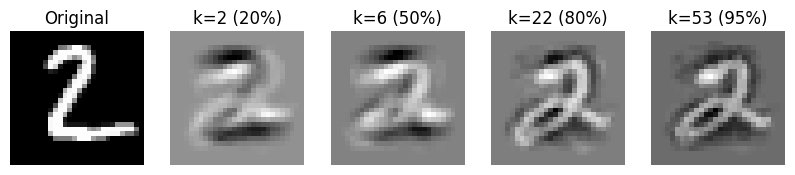

In [25]:
# Enter your solution here
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Step 2: Standardize the dataset (mean-center the data)
X_meaned = X - np.mean(X, axis=0)

# Step 3: Perform PCA on the dataset
pca = PCA()
pca.fit(X_meaned)

# Step 4: Get cumulative variance explained by principal components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 5: Find the number of components for each explained variance (20%, 50%, 80%, 95%)
k_20 = np.argmax(cumulative_variance >= 0.20) + 1
k_50 = np.argmax(cumulative_variance >= 0.50) + 1
k_80 = np.argmax(cumulative_variance >= 0.80) + 1
k_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Step 6: Reconstruct the image using the top-k components for each case
def reconstruct_image(pca, X_meaned, test_image, k):
    # Project the image onto the top k components
    transformed_image = pca.transform(X_meaned[:1])[:, :k]  # Project only the test image
    # Reconstruct the image using the top k components
    reconstructed_image = pca.inverse_transform(np.hstack([transformed_image, np.zeros((1, pca.n_components_ - k))]))
    return reconstructed_image[0]

# Reconstruct the test image using k=20%, 50%, 80%, 95%
test_image_20 = reconstruct_image(pca, X_meaned, test_image, k_20)
test_image_50 = reconstruct_image(pca, X_meaned, test_image, k_50)
test_image_80 = reconstruct_image(pca, X_meaned, test_image, k_80)
test_image_95 = reconstruct_image(pca, X_meaned, test_image, k_95)

# Step 7: Visualize the original and reconstructed images
def plot_images(original, images, titles):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, len(images)+1, 1)
    plt.imshow(original.reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    for i, img in enumerate(images):
        plt.subplot(1, len(images)+1, i+2)
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.title(titles[i])
        plt.axis('off')

# Plot the original and reconstructed images
plot_images(test_image, [test_image_20, test_image_50, test_image_80, test_image_95],
            [f"k={k_20} (20%)", f"k={k_50} (50%)", f"k={k_80} (80%)", f"k={k_95} (95%)"])
plt.show()